In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
np.random.seed(1000)
n=10000
y=np.zeros(n)

x1=np.random.uniform(0,2*(np.pi),n)
x2=np.random.uniform(0,2*(np.pi),n)


for i in range(n):
    y[i] = np.sin(x1[i]+x2[i])
    
x1_mean = sum(x1)/len(x1)
x2_mean = sum(x2)/len(x2)
x1_variance = np.std(x1)
x2_variance = np.std(x2)

x1_normalize = (x1-x1_mean)/x1_variance
x2_normalize = (x2-x2_mean)/x2_variance

data = np.array([x1_normalize,x2_normalize,y])
train_data = data[:,:int(0.6*n)]
validation_data = data[:,int(0.6*n):int(0.8*n)]
test_data = data[:,int(0.8*n):n]

In [2]:
def ReLU(x):
    data=np.zeros(np.size(x))
    for i in range(np.size(x)):
        data[i]=max(0,x[i])
   
    return data

def der_ReLU(x):
    data=np.zeros(np.size(x))
    for i in range(np.size(x)):
        data[i] = 1 if x[i]>0 else 0 
   
    return data

def Sine_train(train_data):
    
    epoch=30
    hidden_layer=150
    input_neurons=2
    output_neurons=1
    learning_rate=0.08

    
    weights_in=  0.001 * np.random.randn(input_neurons,hidden_layer)
    bias_in=np.zeros(hidden_layer)

    weights_out= 0.001 * np.random.randn(hidden_layer)
    for i in range(epoch):
        for j in range(np.size(train_data[0,:])):
            
            x1_train=train_data[0,j]
            x2_train=train_data[1,j]
            y_train= train_data[2,j]
            #forward propogation
    
            hidden_layer_input= weights_in[0]*x1_train+weights_in[1]*x2_train+bias_in
    
            hidden_layer_output=ReLU(hidden_layer_input)

            predicted_output=np.dot(hidden_layer_output,weights_out)
        
            # #backward propogation 
    
            Error=(predicted_output-y_train)  

   
            delta_w2=hidden_layer_output*Error
            delta_w1_1=weights_out*Error * der_ReLU(hidden_layer_input)*x1_train
            delta_w1_2=weights_out*Error * der_ReLU(hidden_layer_input)*x2_train

            delta_b1=weights_out*Error * der_ReLU(hidden_layer_input)

            delta_w1=np.zeros((2,hidden_layer))
            delta_w1[0]=delta_w1_1
            delta_w1[1]=delta_w1_2

            weights_out-=delta_w2*learning_rate
            weights_in-=delta_w1*learning_rate
            bias_in-=delta_b1*learning_rate
    

    return weights_out,weights_in,bias_in


In [3]:
weights_out,weights_in,bias_in=Sine_train(train_data)

In [8]:
data_plot = np.array([x2[int(0.8*np.size(x1)):np.size(x1)],x2_normalize[int(0.8*np.size(x2)):np.size(x2)]])
data_plot_sort = data_plot[:, data_plot[0].argsort()]

test_data=np.array([data_plot_sort[1,:],np.zeros(2000)])

x1_test=test_data[0,:]
x2_test=test_data[1,:]
p=np.size(x1_test)
sin_value_vector=np.zeros(p)
f_test=np.zeros(p)
for i in range(p):
    
    x1_test=test_data[0,i]
    x2_test=test_data[1,i]
    
    hidden_layer_input= weights_in[0]*x1_test+weights_in[1]*x2_test+bias_in
    
    hidden_layer_output=ReLU(hidden_layer_input)

    sin_value_vector[i]=np.dot(hidden_layer_output,weights_out)
    f_test[i] = np.sin(data_plot_sort[0,i])
    
sin_value_vector



array([ 0.01207362,  0.01088042,  0.00328276, ..., -0.00167516,
       -0.00545   , -0.01071805])

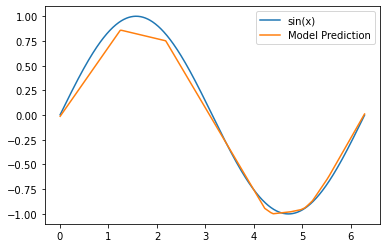

In [10]:
plt.plot(data_plot_sort[0,:],f_test)
plt.plot(data_plot_sort[0,:],-sin_value_vector)
plt.legend(["sin(x)", "Model Prediction"])
plt.show()